# Zadania 1,2

1. Wczytać dane-1 znajdujących się na stronie https://theta.edu.pl/teaching/statystycznemodelowanie-danych-biologicznych/
2. Dla danych wyznaczyć zmienną anemia. Przyjąć, że kobiety (0) mają anemię, jeśli ich 
hemoglobina < 12, a mężczyźni (1) jeśli ich hemoglobina < 13.

In [1]:
library(data.table)

dane1 <- fread('http://theta.edu.pl/wp-content/uploads/2023/10/Dane.csv')
df2 <- data.frame(rep(0, nrow(dane1)))
dane1 <- cbind(dane1, df2)
colnames(dane1)[length(colnames(dane1))] <- 'Anemia'

for (i in 1:nrow(dane1)){
    
    # kobiety
    if (dane1$SEX[i] == 0){
        if (dane1$Hemoglobina[i] < 12){
            dane1$Anemia[i] <- 'sick'
        }
        else{dane1$Anemia[i] <- 'healthy'}
    }
    
    # mezczyzni
    else{
        if (dane1$Hemoglobina[i] < 13){
            dane1$Anemia[i] <- 'sick'
        }
        else{dane1$Anemia[i] <- 'healthy'}
    }
}

head(dane1)

Start,Stop,SEX,height,weight,NTproBNP,Hemoglobina,sTfR,zgon,Anemia
2008-12-23,2011-07-01,1,177,100,4.127134,12.24621,0.7561220,1,sick
2008-12-23,2011-07-01,0,170,84,5.351858,12.89075,0.9669838,1,healthy
2008-12-19,2011-07-01,0,179,76,4.276666,14.34096,0.7030975,0,healthy
2008-12-19,2011-07-01,1,186,121,5.036953,14.50209,0.8837675,1,healthy
2008-12-18,2011-07-01,1,157,56,5.726848,16.27457,0.8586616,1,healthy
2008-12-18,2011-07-01,1,169,74,5.288267,14.50209,0.7793249,1,healthy


# Zadanie 3

Wyznaczając statystyki hazard ratio (HR), relative risk (RR) i odds ratio (OR) sprawdź, 
czy istnieją różnice w zachorowaniu na anemie pomiędzy płciami.

## OR Odds Ratio

In [2]:
tab_OR <- table(dane1$SEX, dane1$Anemia)
tab_OR
# popratrzeć na tab_OR i wszystko będzie jasne odnośnie OR
OR <-  (1 / 16) / (6 / 64)
OR

E1 <-  7/87*17 # (ilosć zdarzen * liczebnosc gr) / ogolna liczebnosc
E2 <-  7/87*70
HR <-  (1 / E1) / (6 / E2)
HR


 0  1 
17 70 

   
    healthy sick
  0      16    1
  1      64    6

[1] 0.6666667

[1] 0.6862745

Wyznaczając statystyki hazard ratio (HR), relative risk (RR) i odds ratio (OR) sprawdź, 
czy istnieją różnice w zachorowaniu na anemie pomiędzy płciami.

#### Odds Ratio

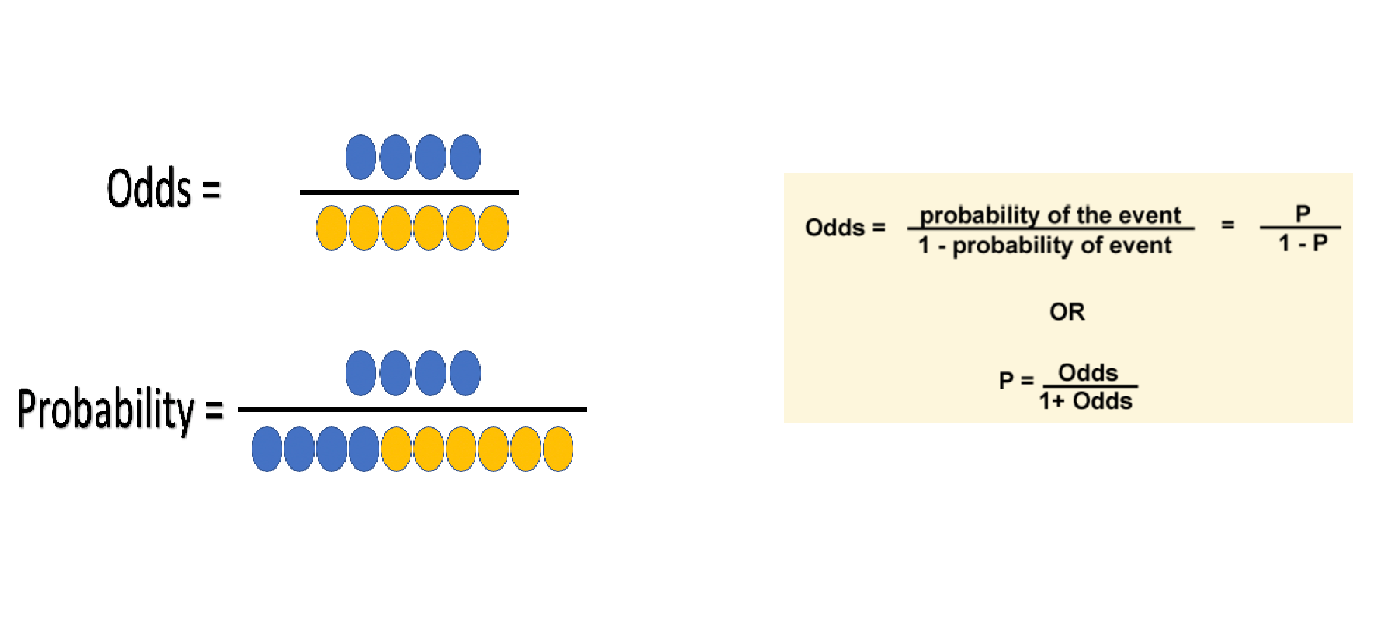

Widać zależność między probability a odds (odds nie muszą mieścić się w zakresie 0-1). Jak chcemy policzyć odds ratio outcome x przy treatment A oraz outcome x przy treatment B, to liczymy najpierw odds A (OD_A) oraz odds B (OD_B) a następnie liczymy odds ratio (OD_A / OD_B). Załóżmy, że nasz odds ratio wynosi 1.45, to znaczy, że outcome x jest 1.45 razy bardziej prawdopodobny przy treatment A.

## Hazard Ratio

Hazard ratio jest podobny z interpretacji jak OR czy RR. Jednak kluczowa różnica to ta, że Hazard ratio jest wyznaczany na podstawie pomiarów trwających w czasie a nie wartości w konkrentym punkcie w czasie.

In [9]:
tab_sex <- table(dane1$SEX)
tab_anemia <- table(dane1$Anemia)
tab_sex_and_anemia <- table(dane1$SEX, dane1$Anemia)

tab_sex
tab_anemia
tab_sex_and_anemia

sick_men <- 6 # z tab_sex_and_anemia
sick_women <- 1 # z tab_sex_and_anemia
sick_total <- sick_men + sick_women # 7
men <- 70 # z tab_sex
women <- 17 # z tab_sex
total <- men + women  # 87


HR_women <-  sick/total*women
HR_men <-  sick/total*men
HR <-  (sick_women / HR_women) / (sick_men / HR_men)
HR


 0  1 
17 70 


healthy    sick 
     80       7 

   
    healthy sick
  0      16    1
  1      64    6

[1] 0.6862745

## Relative Risk

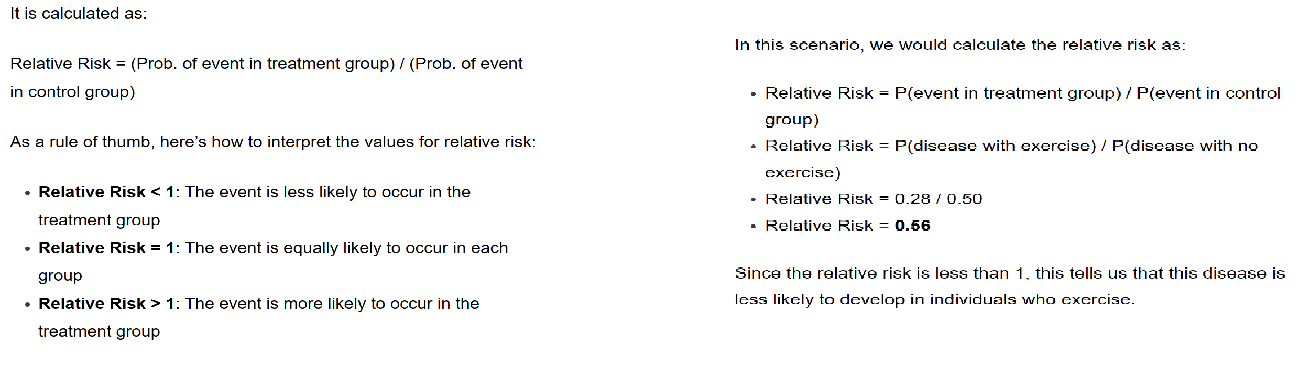

In [8]:
women <- dane1[dane1$SEX == 0,]
men <- dane1[dane1$SEX == 1,]
dead_women <- women[women$zgon == 1,]
alive_women <- women[women$zgon == 0,]
dead_men <- men[men$zgon == 1,]
alive_men <- men[men$zgon == 0,]

dead_women_count <- nrow(dead_women)
total_women_count <- nrow(women)
P_dead_women <- dead_women_count/total_women_count

dead_men_count <- nrow(dead_men)
total_men_count <- nrow(men)
P_dead_men <- dead_men_count/total_men_count

RR <- P_dead_men/P_dead_women

print(RR)

[1] 1.244643


Mężczyźni są 1.24 razy bardziej narażeni na anemię niż kobiety. Jednak jest to różnica nieistotna, ponieważ p-value wynosi 1. Kobiety (0) są uznawane za grupę kontrolną.

# Zadanie 4

Dla powyższych danych wyznaczyć czas przeżycia każdego z pacjentów, a następnie 
wyznaczyć 3-letni "follow-up" oraz estymator funkcji przeżycia Kaplana-Meiera.

#### wyznaczanie czasu przeżycia

In [5]:
dane1$Start = as.Date(dane1$Start, "%Y-%m-%d")
dane1$Stop = as.Date(dane1$Stop, "%Y-%m-%d")
survival_time <- 1:nrow(dane1)

for (i in 1:nrow(dane1)){
    survival_time[i] <- dane1$Stop[i] - dane1$Start[i]
}

dane1$survival_time <- survival_time

head(dane1)

Start,Stop,SEX,height,weight,NTproBNP,Hemoglobina,sTfR,zgon,Anemia,survival_time
2008-12-23,2011-07-01,1,177,100,4.127134,12.24621,0.7561220,1,sick,920
2008-12-23,2011-07-01,0,170,84,5.351858,12.89075,0.9669838,1,healthy,920
2008-12-19,2011-07-01,0,179,76,4.276666,14.34096,0.7030975,0,healthy,924
2008-12-19,2011-07-01,1,186,121,5.036953,14.50209,0.8837675,1,healthy,924
2008-12-18,2011-07-01,1,157,56,5.726848,16.27457,0.8586616,1,healthy,925
2008-12-18,2011-07-01,1,169,74,5.288267,14.50209,0.7793249,1,healthy,925


#### 3-letni follow up oraz estymator funkcji Keplana-Meyera

Call: survfit(formula = Surv(dane1$survival_time_trimmed, dane1$zgon_new) ~ 
    1)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
  920     87       2    0.977  0.0161        0.946        1.000
  924     85       1    0.966  0.0196        0.928        1.000
  925     83       2    0.942  0.0251        0.894        0.993
  938     77       1    0.930  0.0276        0.878        0.986
  939     76       2    0.906  0.0318        0.845        0.970
  946     72       1    0.893  0.0338        0.829        0.962
  959     69       1    0.880  0.0357        0.813        0.953
  960     68       2    0.854  0.0390        0.781        0.934
  966     66       2    0.828  0.0419        0.750        0.915
  981     61       3    0.788  0.0460        0.702        0.883
 1003     56       1    0.773  0.0473        0.686        0.872
 1008     54       1    0.759  0.0485        0.670        0.860
 1009     53       2    0.730  0.0507        0.638        0.837
 1015     51       

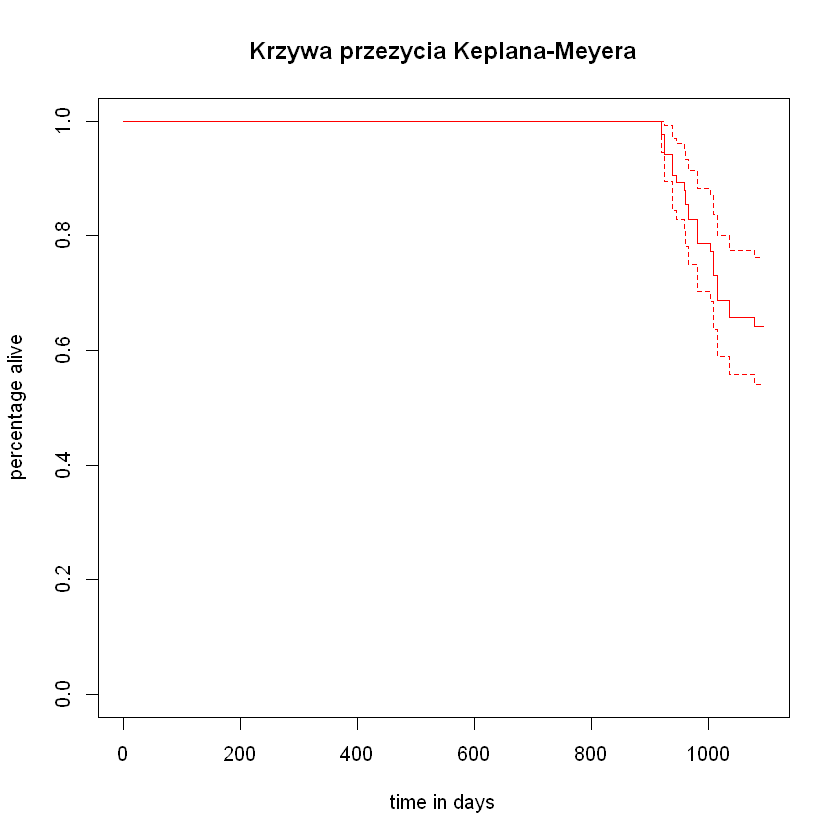

In [13]:
# jeśli survival time jest dłuższy niż 3 lata (1095 dni) to ustaw go na 3 lata ...
# ... w innym wypadku zostaw go bez zmian
dane1$survival_time_trimmed <- ifelse(dane1$survival_time > 1095, 1095, dane1$survival_time)

# jeśli czas przeżycia jest ponad 3 lata oraz jeśli pacjent umarł ...
# ... to ustaw go jako żywego, ponieważ badamy tylko 3 lata ...
# ... jeśli ktoś przeżył dłużej niż 3 lata to uznajemy go za żywego
dane1$zgon_new <- ifelse((dane1$survival_time > 1095) & (dane1$zgon == 1), 0, dane1$zgon)

#krzywa kaplana-mayera używając zgon_new oraz survival_time_trimmed
library(survival)
surv <- survfit(Surv(dane1$survival_time_trimmed, dane1$zgon_new)~1)
summary(surv)
plot <- plot(survfit(Surv(dane1$survival_time_trimmed, dane1$zgon_new)~1), col = 'red', xlab = 'time in days', ylab = 'percentage alive', main = 'Krzywa przeżycia Keplana-Meyera')


# Zadanie 5

Jaki rozkłada się czas przeżycia pacjentów?

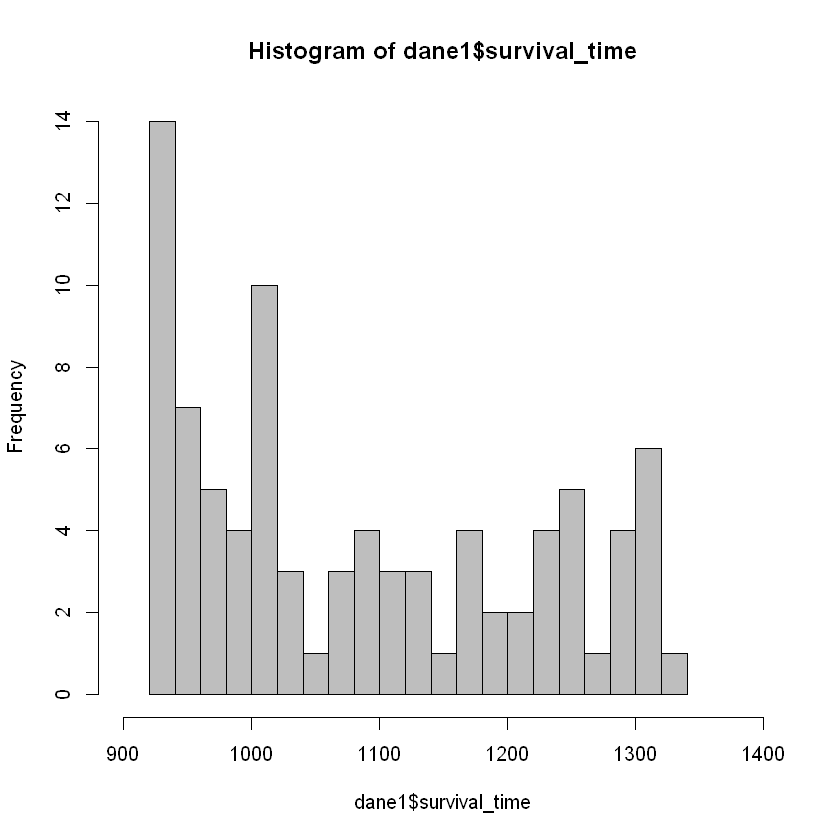

In [65]:
hist(dane1$survival_time, breaks = 20, col = 'grey', xlim = c(900, 1400))

# Zadanie 6 

Wyznaczyć medianę przeżycia i jej 95% przedział ufności oraz wyznaczyć funkcję 
hazardu dla pierwszego i trzeciego roku

In [1]:
# nie ma mediany przeżycia bo jak sie popratrzy na wykres z zadania 4...
# ... to widać, że nie ma takiego czasu, w którym przeżyło jedynie 50% pacjentów

In [6]:
# f hazardu dla 1 roku
h1 <- 0/(365*87)
# 0 pacjentów zmarło w 1szym roku --> patrz histogram czasu przeżycia
# mamy 87 pacjentów i 365 dni w roku

# dla drugiego roku analogicznie jak dla 1szego


# f hazardu dla konkretnych lat robi się tak jak w przykładzie na wykładzie
# z tym, że jak robimy dla innego roku niż 1 to odejmujemy od czasu przeżycia 12...
#...dla drugiego roku, 24 dla 3 roku, 36 dla 4 roku itd...